In [1]:
import pandas as pd
import numpy as np
from numpy import median,mean
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
import chart_studio.plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import geopandas as gv
init_notebook_mode(connected=True)
%matplotlib inline
df = pd.read_csv('Africa_1997-2018_Dec15.csv')

In [2]:
df.columns

Index(['ISO', 'EVENT_ID_CNTY', 'EVENT_ID_NO_CNTY', 'EVENT_DATE', 'YEAR',
       'TIME_PRECISION', 'EVENT_TYPE', 'ACTOR1', 'ASSOC_ACTOR_1', 'INTER1',
       'ACTOR2', 'ASSOC_ACTOR_2', 'INTER2', 'INTERACTION', 'REGION', 'COUNTRY',
       'ADMIN1', 'ADMIN2', 'ADMIN3', 'LOCATION', 'LATITUDE', 'LONGITUDE',
       'GEO_PRECISION', 'SOURCE', 'SOURCE_SCALE', 'NOTES', 'FATALITIES',
       'TIMESTAMP'],
      dtype='object')

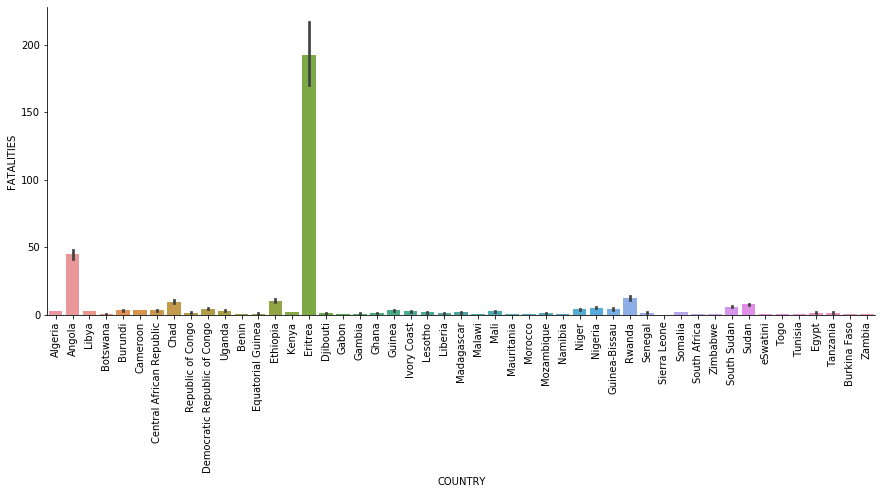

In [3]:
g = sns.catplot('COUNTRY', 'FATALITIES',  data = df, estimator=mean, ci=68,kind='bar', aspect=2.5)
g.set_xticklabels(rotation=90)

# Filter dataframe for all events involving violence against civillians

In [4]:
violence_against_civilians = df[df['EVENT_TYPE'] == 'Violence against civilians']

In [5]:
actor_1 = violence_against_civilians['ACTOR1']


# Making new dataframe to the groups involved with all the event involving violence against civillians

In [6]:
actor1_vs_fatalities= violence_against_civilians[['ACTOR1', 'FATALITIES', 'COUNTRY', 'YEAR', 'ISO']]

In [8]:
Top_10_incidents = actor1_vs_fatalities.nlargest(10, 'FATALITIES')

In [9]:
Top_10_incidents.drop_duplicates()

,ACTOR1,FATALITIES,COUNTRY,YEAR,ISO
36594,Military Forces of Eritrea (1993-),1369,Ethiopia,1999,231
41553,Military Forces of Ethiopia (1991-),1369,Eritrea,1999,232
5705,UNITA: National Union for the Total Independen...,1000,Angola,1997,24
5971,UNITA: National Union for the Total Independen...,1000,Angola,1998,24
6148,Unidentified Armed Group (Angola),1000,Angola,1998,24


# Countries with the top 10 incidents with most casualities

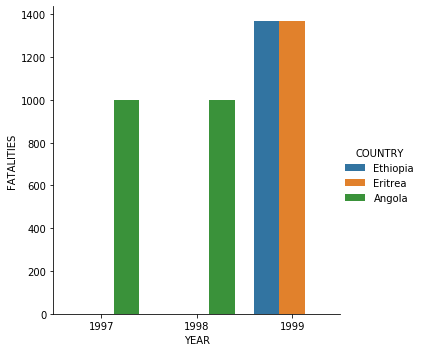

In [11]:
g = sns.catplot('YEAR', 'FATALITIES', hue='COUNTRY',  data = Top_10_incidents,kind='bar')

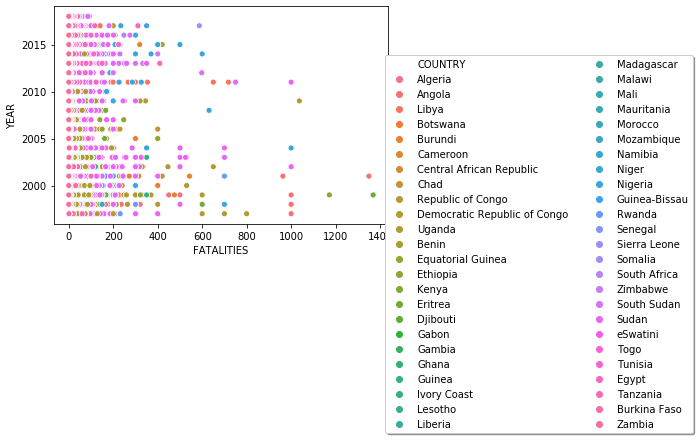

In [12]:
ax = sns.scatterplot(x = 'FATALITIES', y = 'YEAR', hue='COUNTRY', data = df)
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=2)
plt.show()

# Filtering dataframe to include all events from 2018

In [13]:
recent_activity = df[(df['YEAR'] == 2018)
  &
  (df['FATALITIES'] > 10)]

In [14]:
recent_activity = recent_activity[['LATITUDE', 'LONGITUDE','ISO', 'YEAR', 'COUNTRY', 'ACTOR1', 'EVENT_TYPE', 'FATALITIES']]

In [15]:
recent_activity.sort_values(['YEAR', 'FATALITIES'], ascending=False, inplace=True)

In [16]:
recent_activity


,LATITUDE,LONGITUDE,ISO,YEAR,COUNTRY,ACTOR1,EVENT_TYPE,FATALITIES
115102,-0.488,42.184,706,2018,Somalia,Military Forces of Somalia (2017-),Battle-No change of territory,93
137488,6.180,34.400,728,2018,South Sudan,Murle Ethnic Militia (South Sudan),Battle-No change of territory,86
81978,13.356,13.427,566,2018,Nigeria,Military Forces of Nigeria (2015-),Battle-No change of territory,83
80655,12.679,13.608,566,2018,Nigeria,Military Forces of Nigeria (2015-),Battle-No change of territory,79
80656,11.250,13.417,566,2018,Nigeria,Military Forces of Nigeria (2015-),Battle-No change of territory,78
...,...,...,...,...,...,...,...,...
167640,31.132,33.798,818,2018,Egypt,Islamic State (Egypt),Battle-No change of territory,11
167744,31.132,33.798,818,2018,Egypt,Police Forces of Egypt (2014-),Battle-No change of territory,11
167754,31.132,33.798,818,2018,Egypt,Military Forces of Egypt (2014-),Battle-No change of territory,11
167780,31.132,33.798,818,2018,Egypt,Police Forces of Egypt (2014-),Battle-No change of territory,11


In [18]:
Top_10_of_2018 = recent_activity.nlargest(10, 'FATALITIES')

# Mapping top 10 incidents based on fatalities in 2018

In [19]:
import folium
from folium import plugins



In [20]:
Top_10_of_2018['LATITUDE'].astype(int)
Top_10_of_2018['LONGITUDE'].astype(int)

115102    42
137488    34
81978     13
80655     13
80656     13
114689    46
81189      6
21987     20
115473    44
115682    47
Name: LONGITUDE, dtype: int32

In [21]:
m = folium.Map(location=[8.7832, 34.5085], zoom_start=4)

for (index, row) in Top_10_of_2018.iterrows():
    folium.Marker(location=[row.loc['LATITUDE'], row.loc['LONGITUDE']],
                 popup=row.loc['ACTOR1'],
                 tooltip='click').add_to(m)

m.add_child(folium.LatLngPopup())

In [22]:
Somalia = df[df['COUNTRY'] == 'Somalia']


In [23]:
Somalia = Somalia[['EVENT_TYPE', 'YEAR', 'ACTOR1', 'FATALITIES']]

In [24]:
Somalia.sort_values( ['YEAR', 'FATALITIES'])

,EVENT_TYPE,YEAR,ACTOR1,FATALITIES
88854,Battle-No change of territory,1997,Unidentified Armed Group (Somalia),0
88858,Battle-No change of territory,1997,AIAI: Al-Itihad Al-Islamia,0
88859,Violence against civilians,1997,Unidentified Armed Group (Somalia),0
88861,Battle-No change of territory,1997,SNA: Somali National Alliance,0
88862,Battle-No change of territory,1997,AIAI: Al-Itihad Al-Islamia,0
...,...,...,...,...
115877,Battle-No change of territory,2018,Al Shabaab,50
115682,Remote violence,2018,Military Forces of the United States,60
115473,Remote violence,2018,AMISOM: African Union Mission in Somalia (2007...,70
114689,Battle-Non-state actor overtakes territory,2018,Military Forces of Somalia (2017-),72


In [25]:
Al_Shabaab = Somalia[Somalia['ACTOR1'] == 'Al Shabaab']

In [26]:
Al_Shabaab

,EVENT_TYPE,YEAR,ACTOR1,FATALITIES
90704,Battle-No change of territory,2006,Al Shabaab,0
90854,Battle-No change of territory,2006,Al Shabaab,0
91033,Battle-No change of territory,2007,Al Shabaab,0
91163,Battle-No change of territory,2007,Al Shabaab,0
91229,Remote violence,2007,Al Shabaab,1
...,...,...,...,...
116105,Violence against civilians,2018,Al Shabaab,3
116106,Battle-No change of territory,2018,Al Shabaab,1
116108,Battle-Non-state actor overtakes territory,2018,Al Shabaab,0
116113,Violence against civilians,2018,Al Shabaab,0


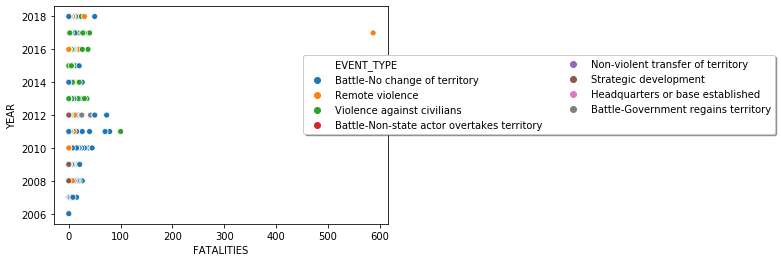

In [27]:
ax = sns.scatterplot(x = 'FATALITIES', y = 'YEAR', hue='EVENT_TYPE', data = Al_Shabaab)
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=2)
plt.show()

In [28]:
year_2011_2018 = Al_Shabaab[Al_Shabaab['YEAR'] >= 2011]

In [29]:
year_2011_2018

,EVENT_TYPE,YEAR,ACTOR1,FATALITIES
95749,Battle-No change of territory,2011,Al Shabaab,12
95765,Battle-No change of territory,2011,Al Shabaab,2
95779,Strategic development,2011,Al Shabaab,0
95785,Battle-No change of territory,2011,Al Shabaab,0
95791,Remote violence,2011,Al Shabaab,1
...,...,...,...,...
116105,Violence against civilians,2018,Al Shabaab,3
116106,Battle-No change of territory,2018,Al Shabaab,1
116108,Battle-Non-state actor overtakes territory,2018,Al Shabaab,0
116113,Violence against civilians,2018,Al Shabaab,0


In [30]:
year_2011_2018['EVENT_TYPE'].value_counts().head(3)

Violence against civilians       1167
Battle-No change of territory     869
Remote violence                   404
Name: EVENT_TYPE, dtype: int64

In [31]:
EVENT_TYPE = year_2011_2018[(year_2011_2018['EVENT_TYPE'] == 'Violence against civilians')
    |
    (year_2011_2018['EVENT_TYPE'] == 'Battle-No change of territory')
    |
    (year_2011_2018['EVENT_TYPE'] == 'Remote violence')]

In [32]:
EVENT_TYPE

,EVENT_TYPE,YEAR,ACTOR1,FATALITIES
95749,Battle-No change of territory,2011,Al Shabaab,12
95765,Battle-No change of territory,2011,Al Shabaab,2
95785,Battle-No change of territory,2011,Al Shabaab,0
95791,Remote violence,2011,Al Shabaab,1
95793,Battle-No change of territory,2011,Al Shabaab,0
...,...,...,...,...
116103,Remote violence,2018,Al Shabaab,0
116105,Violence against civilians,2018,Al Shabaab,3
116106,Battle-No change of territory,2018,Al Shabaab,1
116113,Violence against civilians,2018,Al Shabaab,0


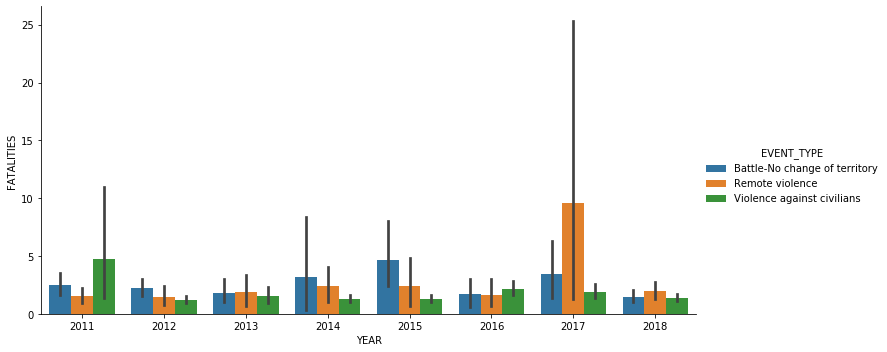

In [33]:
g = sns.catplot('YEAR', 'FATALITIES', hue='EVENT_TYPE',  data = EVENT_TYPE,kind='bar', aspect=2) #ci is the size of confidence intervals